In [4]:
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [2]:
train_df = pd.read_csv('D://downloads//train.csv')
test_df = pd.read_csv('D://downloads//test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include = ['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Troupiansky, Mr. Moses Aaron",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


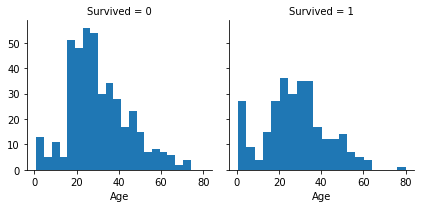

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


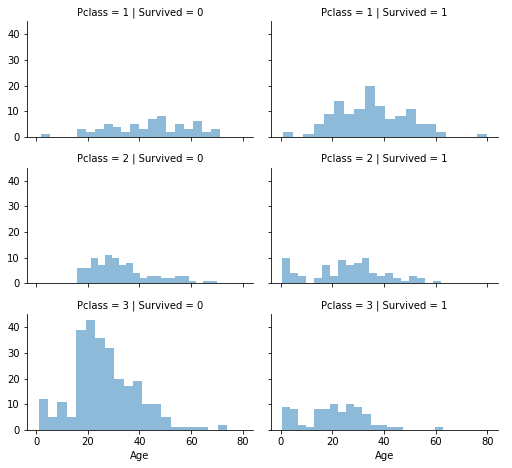

In [14]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


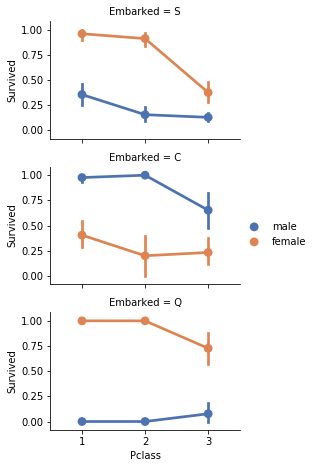

In [15]:
grid = sns.FacetGrid(train_df, row = 'Embarked', size=2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived','Sex', palette = 'deep')
grid.add_legend()

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


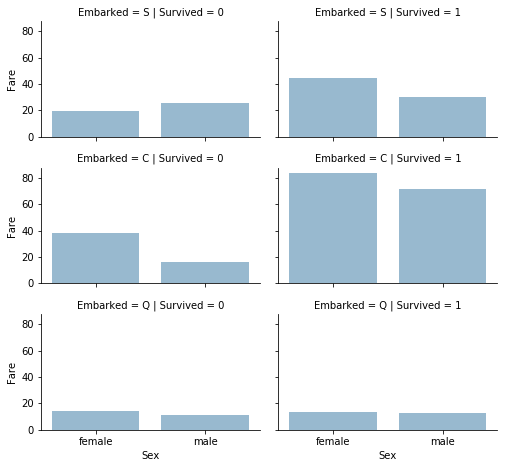

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked', col = 'Survived', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare',alpha = .5, ci = None)
grid.add_legend()

In [17]:
print("before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Cabin','Ticket'], axis=1)
test_df = test_df.drop(['Cabin','Ticket'], axis =1)
combine = [train_df, test_df]
print("after", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

before (891, 12) (418, 11) (891, 12) (418, 11)
after (891, 10) (418, 9) (891, 10) (418, 9)


In [18]:
for dataset in combine:
    dataset['title'] = dataset.Name.str.extract(' ([A-Za-z]+)\. ', expand = False)
pd.crosstab(train_df['title'], train_df['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
    dataset['title'] = dataset['title'].replace(['Capt','Col','Lady','Countess','Don','Dr','Jonkheer','Major','Rev','Sir'],'Rare')
    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')

In [20]:
train_df[['title','Survived']].groupby(['title'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [21]:
title_mapping = {"Mrs":1, "Miss":2, "Master":3, "Rare":4, "Mr":5}
for dataset in combine:
    dataset['title'] = dataset['title'].map(title_mapping)
    dataset['title'] = dataset['title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5


In [22]:
train_df = train_df.drop(['Name','PassengerId'], axis =1)
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({"male":1, "female":0}).astype(int)

In [24]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,1,22.0,1,0,7.2500,S,5
1,1,1,0,38.0,1,0,71.2833,C,1
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,1
4,0,3,1,35.0,0,0,8.0500,S,5


D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


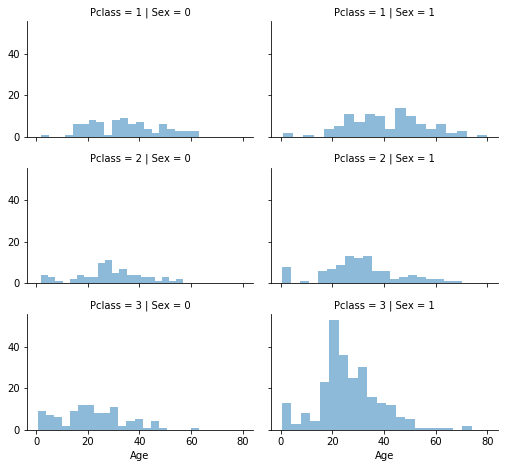

In [25]:
grid = sns.FacetGrid(train_df, row= 'Pclass', col = 'Sex', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend()

In [26]:
guess_ages = np.zeros((2,3))

In [27]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()
                                                                                                               

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,1,22,1,0,7.2500,S,5
1,1,1,0,38,1,0,71.2833,C,1
2,1,3,0,26,0,0,7.9250,S,2
3,1,1,0,35,1,0,53.1000,S,1
4,0,3,1,35,0,0,8.0500,S,5


In [28]:
train_df['Age_band'] = pd.cut(train_df['Age'],5)
train_df[['Age_band','Survived']].groupby('Age_band', as_index = False).mean().sort_values(by='Age_band', ascending =True)

,Age_band,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [29]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Age_band
0,0,3,1,1,1,0,7.2500,S,5,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,1,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,1,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,5,"(32.0, 48.0]"


In [30]:
train_df = train_df.drop(['Age_band'], axis= 1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,1,1,1,0,7.2500,S,5
1,1,1,0,2,1,0,71.2833,C,1
2,1,3,0,1,0,0,7.9250,S,2
3,1,1,0,2,1,0,53.1000,S,1
4,0,3,1,2,0,0,8.0500,S,5


In [31]:
for dataset in combine:
    dataset['familysize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['familysize','Survived']].groupby('familysize', as_index = False).mean().sort_values(by = 'Survived', ascending  = False)    

,familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [32]:
for dataset in combine:
    dataset['isalone'] = 0
    dataset.loc[dataset['familysize'] == 1, 'isalone'] = 1
train_df[['isalone','Survived']].groupby('isalone', as_index = False).mean()

,isalone,Survived
0,0,0.505650
1,1,0.303538


In [33]:
train_df = train_df.drop(['SibSp','Parch','familysize'], axis =1)
test_df = test_df.drop(['SibSp','Parch','familysize'], axis =1)

combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,isalone
0,0,3,1,1,7.2500,S,5,0
1,1,1,0,2,71.2833,C,1,0
2,1,3,0,1,7.9250,S,2,1
3,1,1,0,2,53.1000,S,1,0
4,0,3,1,2,8.0500,S,5,1


In [34]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [35]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,isalone,Age*Class
0,0,3,1,1,7.2500,0,5,0,3
1,1,1,0,2,71.2833,1,1,0,2
2,1,3,0,1,7.9250,0,2,1,3
3,1,1,0,2,53.1000,0,1,0,2
4,0,3,1,2,8.0500,0,5,1,6


In [38]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,title,isalone,Age*Class
0,892,3,1,2,7.8292,2,5.0,1,6
1,893,3,0,2,7.0000,0,1.0,0,6
2,894,2,1,3,9.6875,2,5.0,1,6
3,895,3,1,1,8.6625,0,5.0,1,3
4,896,3,0,1,12.2875,0,1.0,0,3


In [39]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [40]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,title,isalone,Age*Class
0,0,3,1,1,0,0,5,0,3
1,1,1,0,2,3,1,1,0,2
2,1,3,0,1,1,0,2,1,3
3,1,1,0,2,3,0,1,0,2
4,0,3,1,2,1,0,5,1,6
5,0,3,1,1,1,2,5,1,3
6,0,1,1,3,3,0,5,1,3
7,0,3,1,0,2,0,3,0,0
8,1,3,0,1,1,0,1,0,3
9,1,2,0,0,2,1,1,0,0


In [41]:
X_train = train_df.drop('Survived', axis =1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis =1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [42]:
#LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, Y_train)
yhat = LR.predict(X_test)
acc = round(LR.score(X_train, Y_train)*100, 2)
acc

#SupportVectorMachine
svc = SVC()
svc.fit(X_train, Y_train)
yhat = svc.predict(X_test)
acc1 = round(svc.score(X_train, Y_train)*100, 2)
acc1

#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree


# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


86.76

In [43]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
                'Linear SVC', 
              'Decision Tree'],
    'Score': [acc1, acc_knn, acc, 
              acc_random_forest, acc_gaussian, 
             acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,86.76
6,Decision Tree,86.76
1,KNN,83.95
0,Support Vector Machines,83.39
5,Linear SVC,81.26
2,Logistic Regression,80.70
4,Naive Bayes,75.31


In [45]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'],
                          'Survived': Y_pred})
submission.to_csv('D://downloads//sub.csv', index= False)